# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st

# Datetime for graph titles
from datetime import date

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 583


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = f'https://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units=metric'

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f'{url}&lat={lats[i]}&lon={lngs[i]}'
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | puerto natales
City not found. Skipping...
Processing Record 2 of Set 1 | waitangi
City not found. Skipping...
Processing Record 3 of Set 1 | porto novo
City not found. Skipping...
Processing Record 4 of Set 1 | hermanus
City not found. Skipping...
Processing Record 5 of Set 1 | port-aux-francais
City not found. Skipping...
Processing Record 6 of Set 1 | san jose de mayo
Processing Record 7 of Set 1 | bilibino
City not found. Skipping...
Processing Record 8 of Set 1 | bethel
City not found. Skipping...
Processing Record 9 of Set 1 | kingston
City not found. Skipping...
Processing Record 10 of Set 1 | arkhangel'sk
City not found. Skipping...
Processing Record 11 of Set 1 | adamstown
City not found. Skipping...
Processing Record 12 of Set 1 | xai-xai
City not found. Skipping...
Processing Record 13 of Set 1 | blackmans bay
City not found. Skipping...
Processing Record 14 of Set 1 | margaret river
C

Processing Record 28 of Set 3 | athens
City not found. Skipping...
Processing Record 29 of Set 3 | washington
City not found. Skipping...
Processing Record 30 of Set 3 | afaahiti
City not found. Skipping...
Processing Record 31 of Set 3 | novoarkhanhel's'k
Processing Record 32 of Set 3 | thenia
Processing Record 33 of Set 3 | massakory
City not found. Skipping...
Processing Record 34 of Set 3 | hithadhoo
City not found. Skipping...
Processing Record 35 of Set 3 | kodiak
City not found. Skipping...
Processing Record 36 of Set 3 | saipan
City not found. Skipping...
Processing Record 37 of Set 3 | homer
City not found. Skipping...
Processing Record 38 of Set 3 | port alfred
Processing Record 39 of Set 3 | tombodu
City not found. Skipping...
Processing Record 40 of Set 3 | qaqortoq
City not found. Skipping...
Processing Record 41 of Set 3 | xingtai
City not found. Skipping...
Processing Record 42 of Set 3 | palangkaraya
City not found. Skipping...
Processing Record 43 of Set 3 | camacupa
C

City not found. Skipping...
Processing Record 11 of Set 6 | grajau
Processing Record 12 of Set 6 | saint-philippe
Processing Record 13 of Set 6 | hamilton
Processing Record 14 of Set 6 | nuuk
City not found. Skipping...
Processing Record 15 of Set 6 | wangaratta
City not found. Skipping...
Processing Record 16 of Set 6 | georgetown
City not found. Skipping...
Processing Record 17 of Set 6 | howrah
City not found. Skipping...
Processing Record 18 of Set 6 | lerwick
City not found. Skipping...
Processing Record 19 of Set 6 | pachino
City not found. Skipping...
Processing Record 20 of Set 6 | timaru
City not found. Skipping...
Processing Record 21 of Set 6 | hammerfest
City not found. Skipping...
Processing Record 22 of Set 6 | north platte
City not found. Skipping...
Processing Record 23 of Set 6 | polyarnyy
City not found. Skipping...
Processing Record 24 of Set 6 | cabo san lucas
City not found. Skipping...
Processing Record 25 of Set 6 | ghat
Processing Record 26 of Set 6 | san rafael

City not found. Skipping...
Processing Record 43 of Set 8 | aljezur
City not found. Skipping...
Processing Record 44 of Set 8 | cidreira
City not found. Skipping...
Processing Record 45 of Set 8 | westport
Processing Record 46 of Set 8 | centralia
City not found. Skipping...
Processing Record 47 of Set 8 | al bardiyah
Processing Record 48 of Set 8 | chardara
City not found. Skipping...
Processing Record 49 of Set 8 | ta`u
City not found. Skipping...
Processing Record 0 of Set 9 | ola
City not found. Skipping...
Processing Record 1 of Set 9 | ciudad lazaro cardenas
City not found. Skipping...
Processing Record 2 of Set 9 | enewetak
City not found. Skipping...
Processing Record 3 of Set 9 | mount pearl
City not found. Skipping...
Processing Record 4 of Set 9 | corralillo
City not found. Skipping...
Processing Record 5 of Set 9 | taoudenni
Processing Record 6 of Set 9 | xinzhou
City not found. Skipping...
Processing Record 7 of Set 9 | saint-francois
City not found. Skipping...
Processing

City not found. Skipping...
Processing Record 27 of Set 11 | dalandzadgad
Processing Record 28 of Set 11 | hadibu
City not found. Skipping...
Processing Record 29 of Set 11 | aniva
City not found. Skipping...
Processing Record 30 of Set 11 | fuyu
City not found. Skipping...
Processing Record 31 of Set 11 | le hocq
City not found. Skipping...
Processing Record 32 of Set 11 | mejit
City not found. Skipping...
Processing Record 33 of Set 11 | mar del plata
Processing Record 34 of Set 11 | thinadhoo
City not found. Skipping...
Processing Record 35 of Set 11 | porto cristo
Processing Record 36 of Set 11 | virginia
City not found. Skipping...
Processing Record 37 of Set 11 | korla
City not found. Skipping...
Processing Record 38 of Set 11 | atlanta
City not found. Skipping...
Processing Record 39 of Set 11 | cole harbour
Processing Record 40 of Set 11 | kouroussa
City not found. Skipping...
Processing Record 41 of Set 11 | dongola
City not found. Skipping...
Processing Record 42 of Set 11 | 

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          158
Lat           158
Lng           158
Max Temp      158
Humidity      158
Cloudiness    158
Wind Speed    158
Country       158
Date          158
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,san jose de mayo,-34.0937,-56.8078,18.57,88,100,4.80,UY,1683320553
1,ilulissat,71.7088,-51.1079,-8.64,89,100,2.07,GL,1683320555
2,cobija,-11.3583,-69.6217,25.78,92,76,0.61,PE,1683320555
3,kuanda,58.2037,117.3751,-5.54,87,91,4.65,RU,1683320555
4,usinsk,68.7204,59.5122,-7.53,95,99,3.02,RU,1683320555


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,san jose de mayo,-34.0937,-56.8078,18.57,88,100,4.80,UY,1683320553
1,ilulissat,71.7088,-51.1079,-8.64,89,100,2.07,GL,1683320555
2,cobija,-11.3583,-69.6217,25.78,92,76,0.61,PE,1683320555
3,kuanda,58.2037,117.3751,-5.54,87,91,4.65,RU,1683320555
4,usinsk,68.7204,59.5122,-7.53,95,99,3.02,RU,1683320555


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

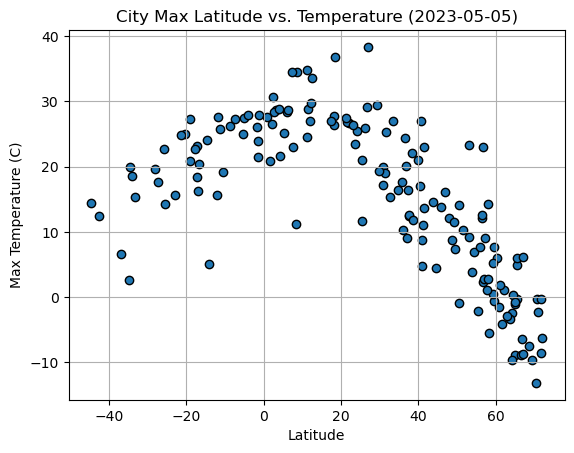

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], edgecolor='black')

# Incorporate the other graph properties

# !!!the starter code had this typo in its example plot!!! - pls make note of it in the comment
plt.title(f'City Max Latitude vs. Temperature ({date.today()})')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

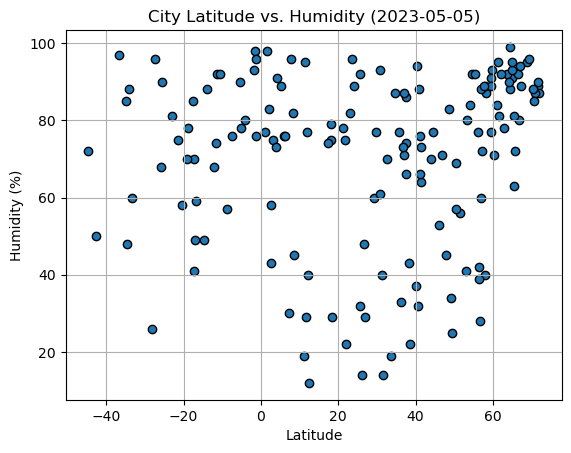

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], edgecolor='black')

# Incorporate the other graph properties
plt.title(f'City Latitude vs. Humidity ({date.today()})')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

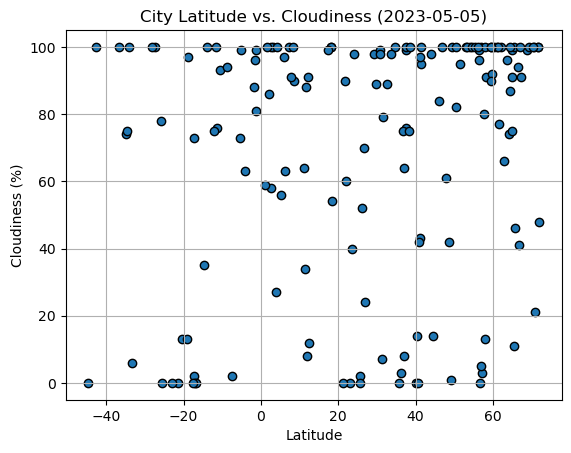

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], edgecolor='black')

# Incorporate the other graph properties
plt.title(f'City Latitude vs. Cloudiness ({date.today()})')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

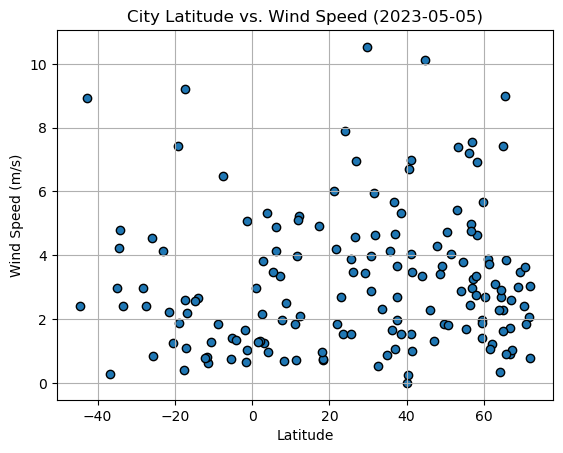

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], edgecolor='black')

# Incorporate the other graph properties
plt.title(f'City Latitude vs. Wind Speed ({date.today()})')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [26]:
# Define a function to create Linear Regression plots
def linear_reg(x, y):
    print(f'The r-value is: {st.pearsonr(x, y)[0]}')
    (slope, intercept, rvalue, pvalue, stderr)=st.linregress(x, y)
    regress_values =  x * slope + intercept
    line_equation = f'y = {str(round(slope,2))}x + {str(round(intercept,2))}'
    plt.scatter(x, y)
    plt.plot(x, regress_values, 'r-')
    plt.xlabel('Latitude')
    plt.ylabel(y.name)
    return line_equation
def anno_format(line_equation, x, y):
    plt.annotate(line_equation, (x,y), fontsize=15,color='red')

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,ilulissat,71.7088,-51.1079,-8.64,89,100,2.07,GL,1683320555
3,kuanda,58.2037,117.3751,-5.54,87,91,4.65,RU,1683320555
4,usinsk,68.7204,59.5122,-7.53,95,99,3.02,RU,1683320555
5,college,72.0395,-155.5592,-6.30,87,48,3.04,US,1683320556
8,jamestown,37.5139,105.7303,12.43,66,99,3.66,CN,1683320559


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,san jose de mayo,-34.0937,-56.8078,18.57,88,100,4.80,UY,1683320553
2,cobija,-11.3583,-69.6217,25.78,92,76,0.61,PE,1683320555
6,manacapuru,-1.8200,-61.3247,26.13,93,88,1.67,BR,1683320556
7,kitangari,-10.5622,39.2899,19.11,92,93,1.28,TZ,1683320557
9,ust'-kut,-11.7473,13.5259,27.60,74,100,0.82,AO,1683320559


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.867390011803095


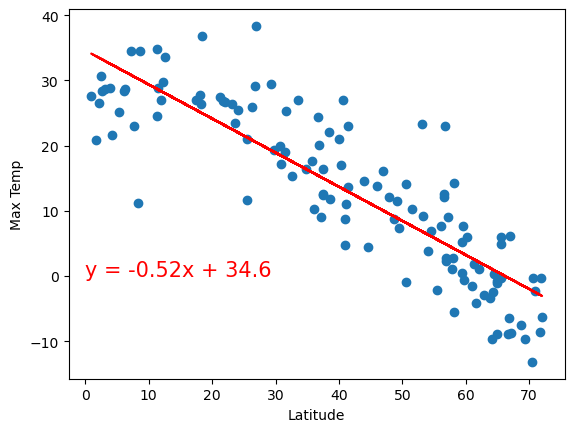

In [23]:
# Linear regression on Northern Hemisphere
x = northern_hemi_df['Lat']
y = northern_hemi_df['Max Temp']
line = linear_reg(x, y)
anno_format(line, 0, 0)

The r-value is: 0.6325537069076581


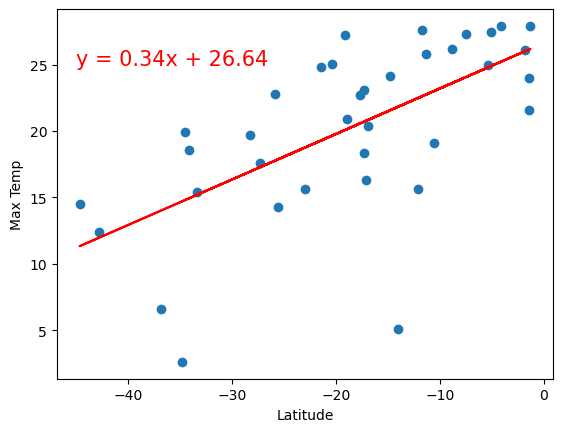

In [30]:
# Linear regression on Southern Hemisphere
x = southern_hemi_df['Lat']
y = southern_hemi_df['Max Temp']
line = linear_reg(x, y)
anno_format(line, -45, 25)

**Discussion about the linear relationship:** Temperature's tend to increase as you approach 0 Latitude (The Equator).

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.29422552102804017


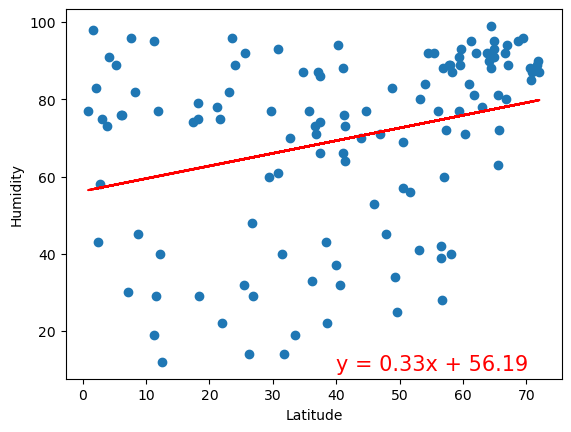

In [34]:
# Northern Hemisphere
x = northern_hemi_df['Lat']
y = northern_hemi_df['Humidity']
line = linear_reg(x, y)
anno_format(line, 40, 10)

The r-value is: 0.2758966464303328


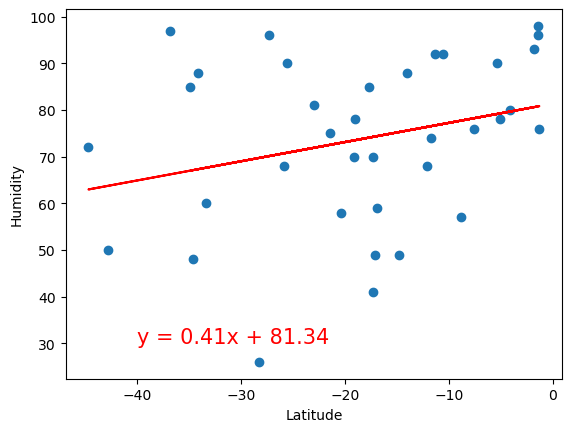

In [37]:
# Southern Hemisphere
x = southern_hemi_df['Lat']
y = southern_hemi_df['Humidity']
line = linear_reg(x, y)
anno_format(line, -40, 30)

**Discussion about the linear relationship:** No discernable patterns

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.13250266856373924


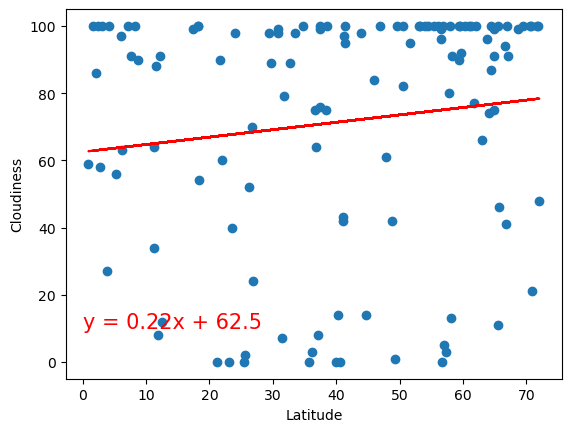

In [39]:
# Northern Hemisphere
x = northern_hemi_df['Lat']
y = northern_hemi_df['Cloudiness']
line = linear_reg(x, y)
anno_format(line, 0, 10)

The r-value is: 0.15492265529055954


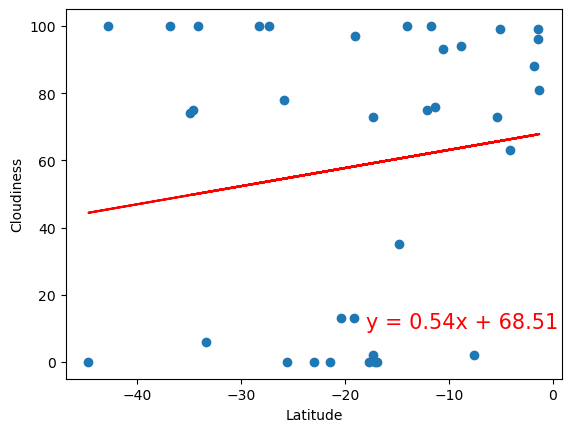

In [43]:
# Southern Hemisphere
x = southern_hemi_df['Lat']
y = southern_hemi_df['Cloudiness']
line = linear_reg(x, y)
anno_format(line, -18, 10)

**Discussion about the linear relationship:** No discernable patterns

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.021022254094660315


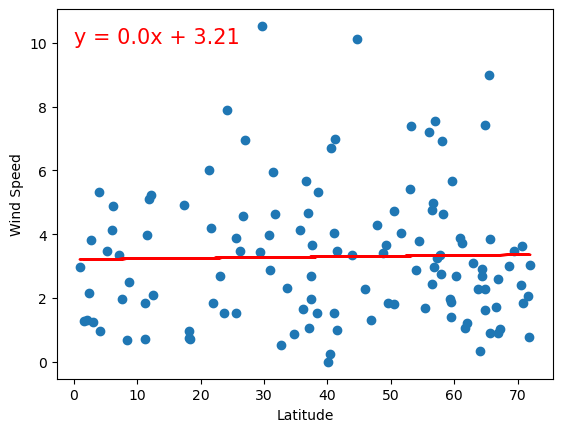

In [45]:
# Northern Hemisphere
x = northern_hemi_df['Lat']
y = northern_hemi_df['Wind Speed']
line = linear_reg(x, y)
anno_format(line, 0, 10)

The r-value is: -0.2873268678996443


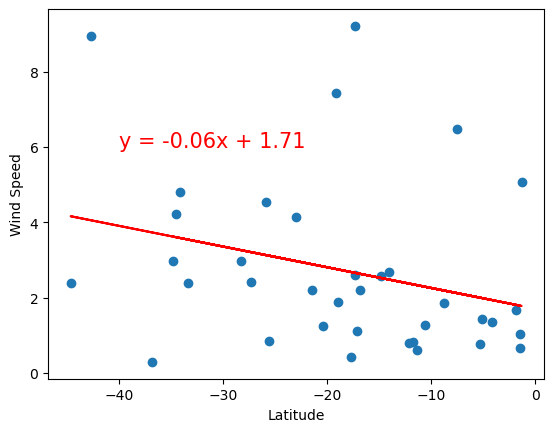

In [47]:
# Southern Hemisphere
x = southern_hemi_df['Lat']
y = southern_hemi_df['Wind Speed']
line = linear_reg(x, y)
anno_format(line, -40, 7)

**Discussion about the linear relationship:** No discernable pattern